In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import os
from tqdm import tqdm

import torch
import torchvision
import torchvision.transforms as transforms
import pickle

from PIL import Image

In [ ]:
def crop_resize_image(image):
    # image.mode = 'I'
    # image = image.point(lambda i:i*(1./256)).convert('L')

    img = transforms.functional.center_crop(image, output_size=[2058])
    img = transforms.functional.resize(img, size=[600])
    return img.convert('RGB')

def preprocess_images(folder_url):
    """
    ==========
    Parâmetros
    ==========
        folder_url : str
            Endereço onde estão localizadas as imagens. Pode possuir os 
            formatos "<sea_id>/<record_name>/input/<cam1 ou cam2>/" ou
            "<sea_id>/<record_name>/input/".
        
    """
    
    # Constantes
    base_path = '/content/gdrive/Shareddrives/TCC - S09/Notebooks/data/'
    data = []

    for img in tqdm(os.listdir(base_path + folder_url)):
      img = Image.open(base_path + folder_url + img)
      img = crop_resize_image(img)
      data.append(img)
        
    return data

In [ ]:
data = preprocess_images('LJ_2018/2018-01-03_09-39-38_10Hz/input/')
print('\n', len(data))
# data += preprocess_images('AA_2015/2015-05-15_09-00-00_12Hz/input/cam2/')
# print('\n', len(data))

100%|██████████| 1800/1800 [20:30<00:00,  1.46it/s]


 1800


In [ ]:
with open('/content/gdrive/Shareddrives/TCC - S09/Notebooks/resized data/LJ_2018_2018-01-03_09-39-38_10Hz_2058_224.pkl', 'wb') as f:
    pickle.dump(data, f)

In [ ]:
with open('/content/gdrive/Shareddrives/TCC - S09/Notebooks/resized data/LJ_2018_2018-01-03_09-39-38_10Hz_2058_224.pkl', 'rb') as f:
    record = pickle.load(f)

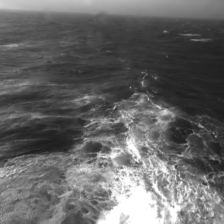

In [ ]:
record[0]

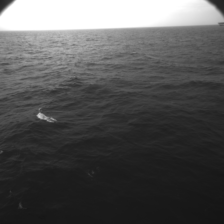

In [ ]:
img = Image.open('/content/gdrive/Shareddrives/TCC - S09/Notebooks/data/AA_2015/2015-05-15_09-00-00_12Hz/input/cam1/001344_0000112000341_01.png')
img = crop_resize_image(img)
img

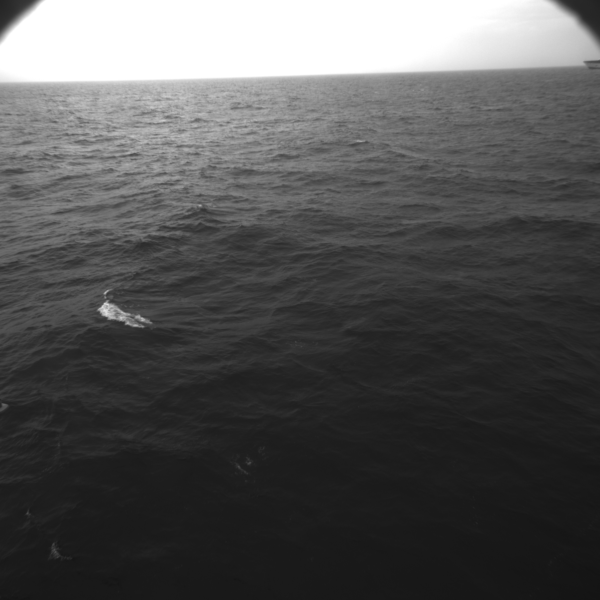

In [ ]:
img = Image.open('/content/gdrive/Shareddrives/TCC - S09/Notebooks/data/AA_2015/2015-05-15_09-00-00_12Hz/input/cam1/001344_0000112000341_01.png')
img = crop_resize_image(img)
img

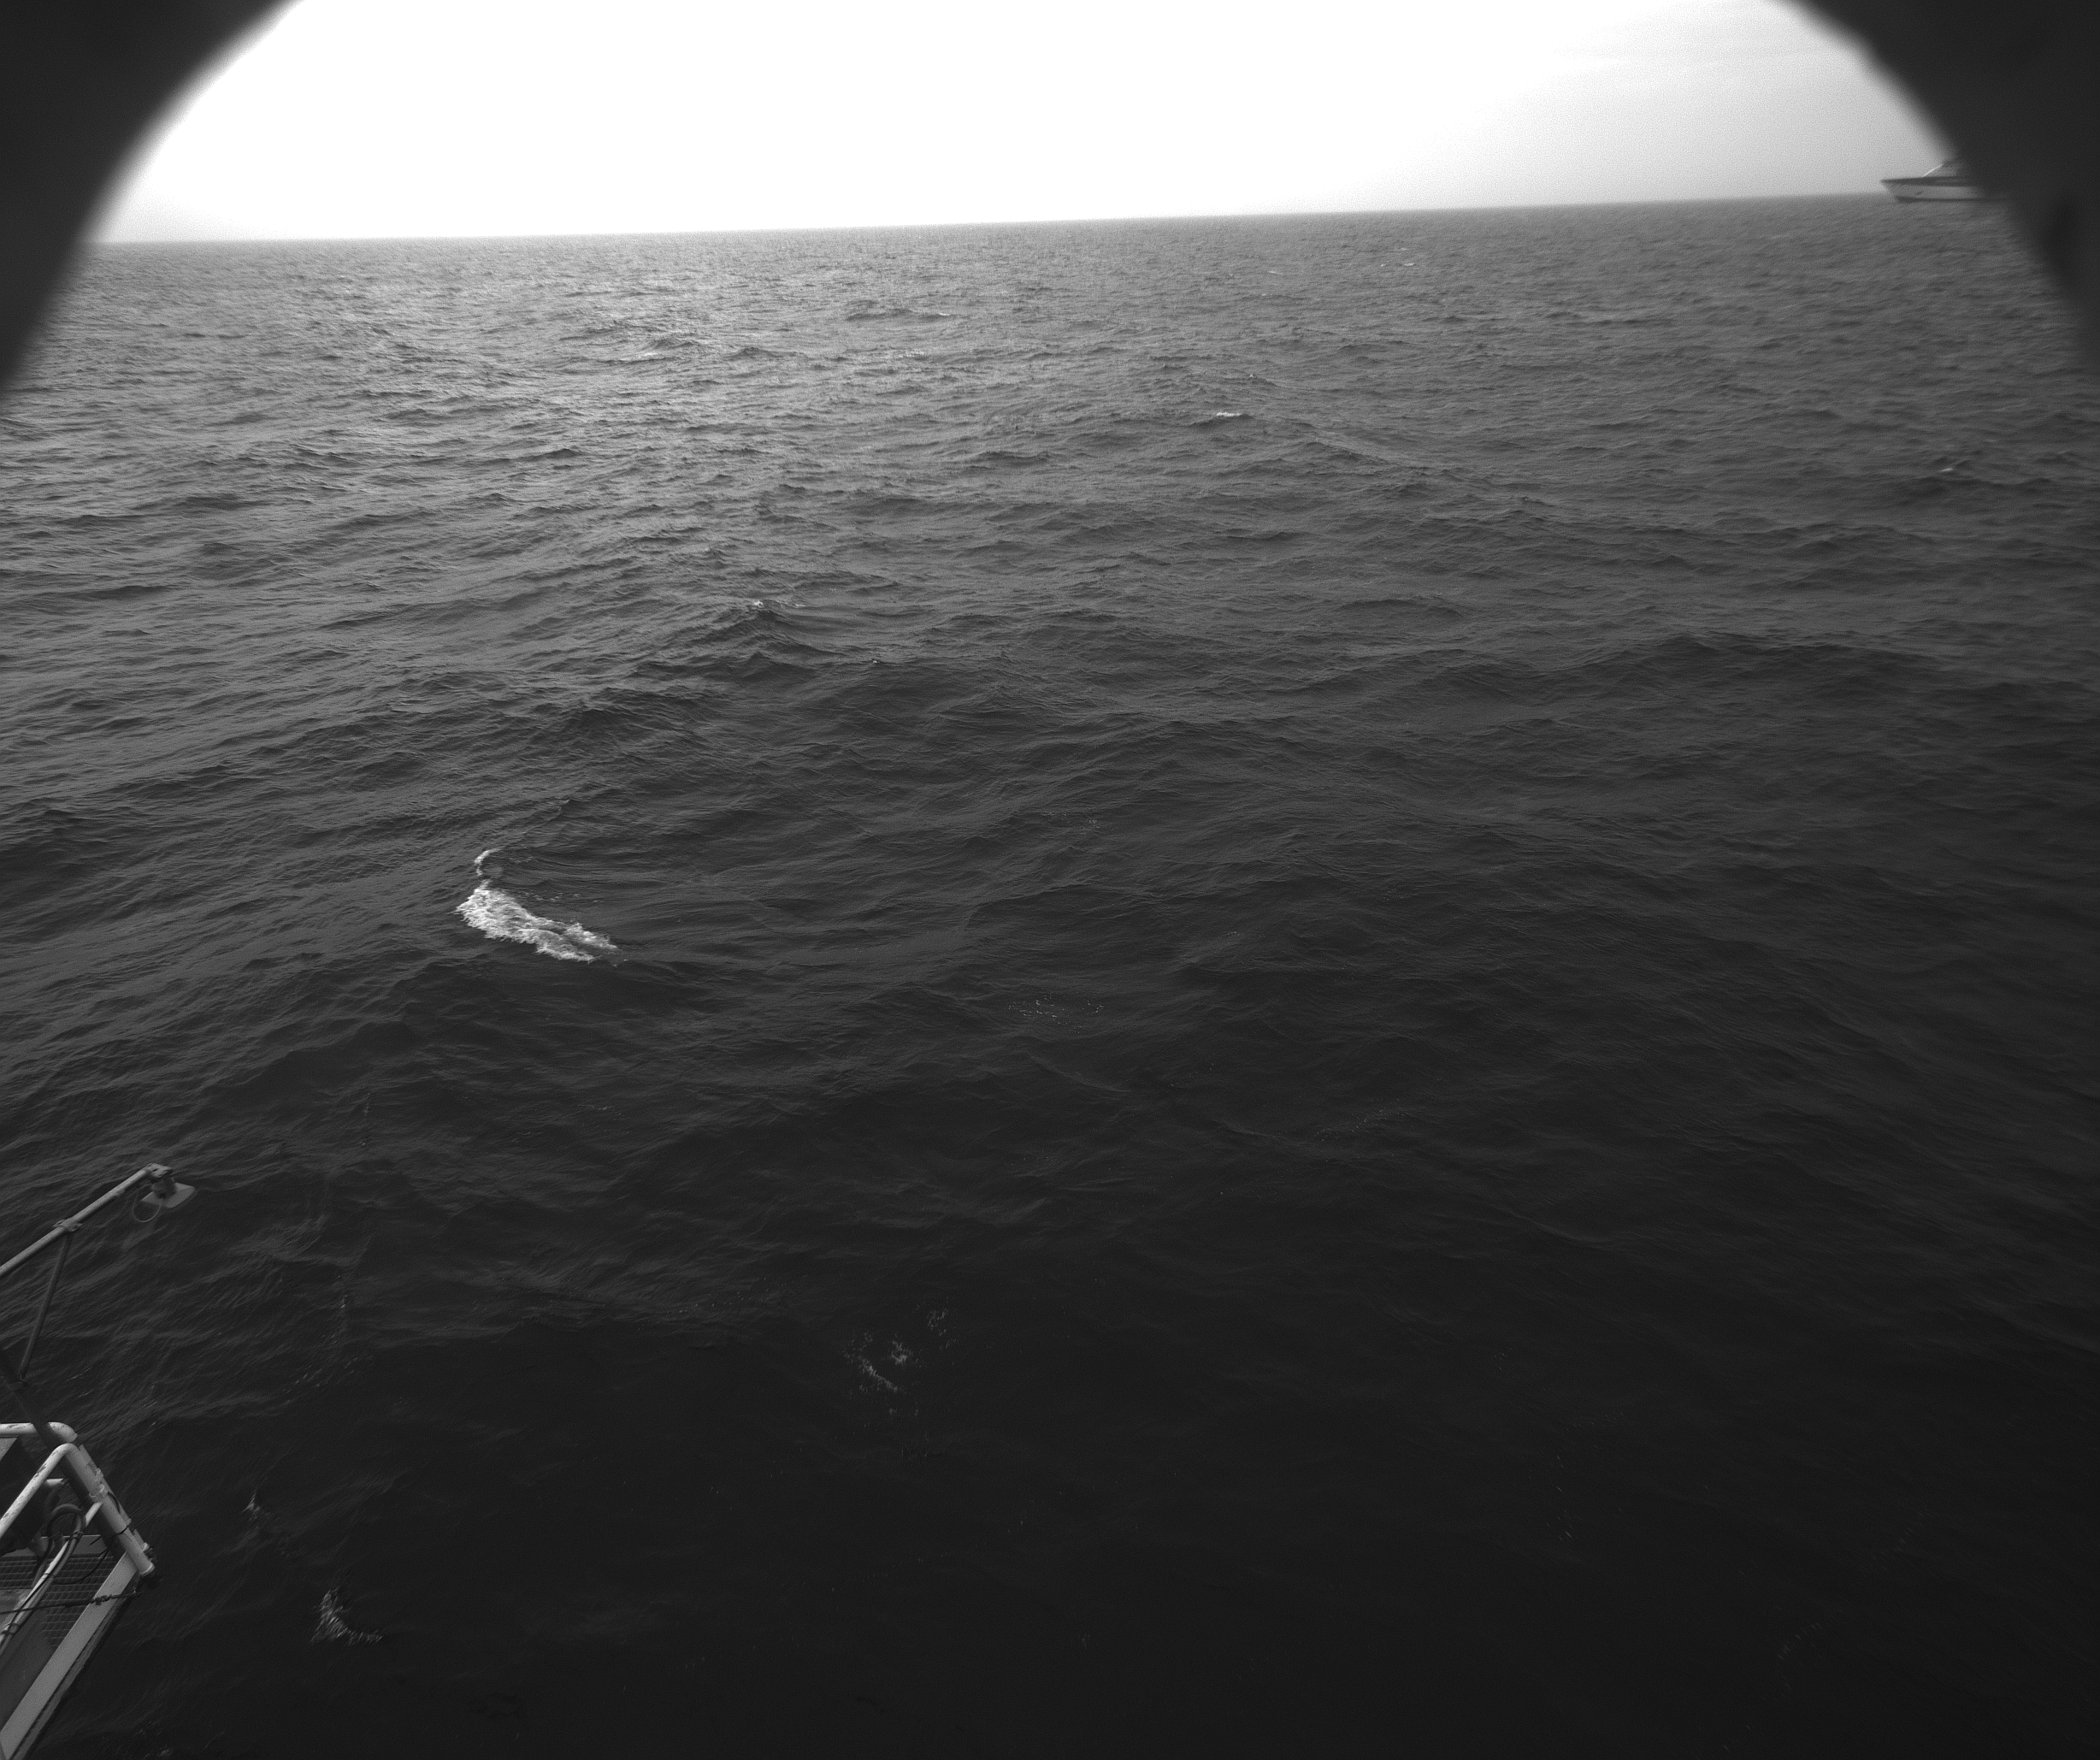

In [ ]:
img = Image.open('/content/gdrive/Shareddrives/TCC - S09/Notebooks/data/AA_2015/2015-05-15_09-00-00_12Hz/input/cam1/001344_0000112000341_01.png')
# img = crop_resize_image(img)
# img
transform = transforms.Compose([
            transforms.RandomAdjustSharpness(4, 1)
    ])

transform(img)

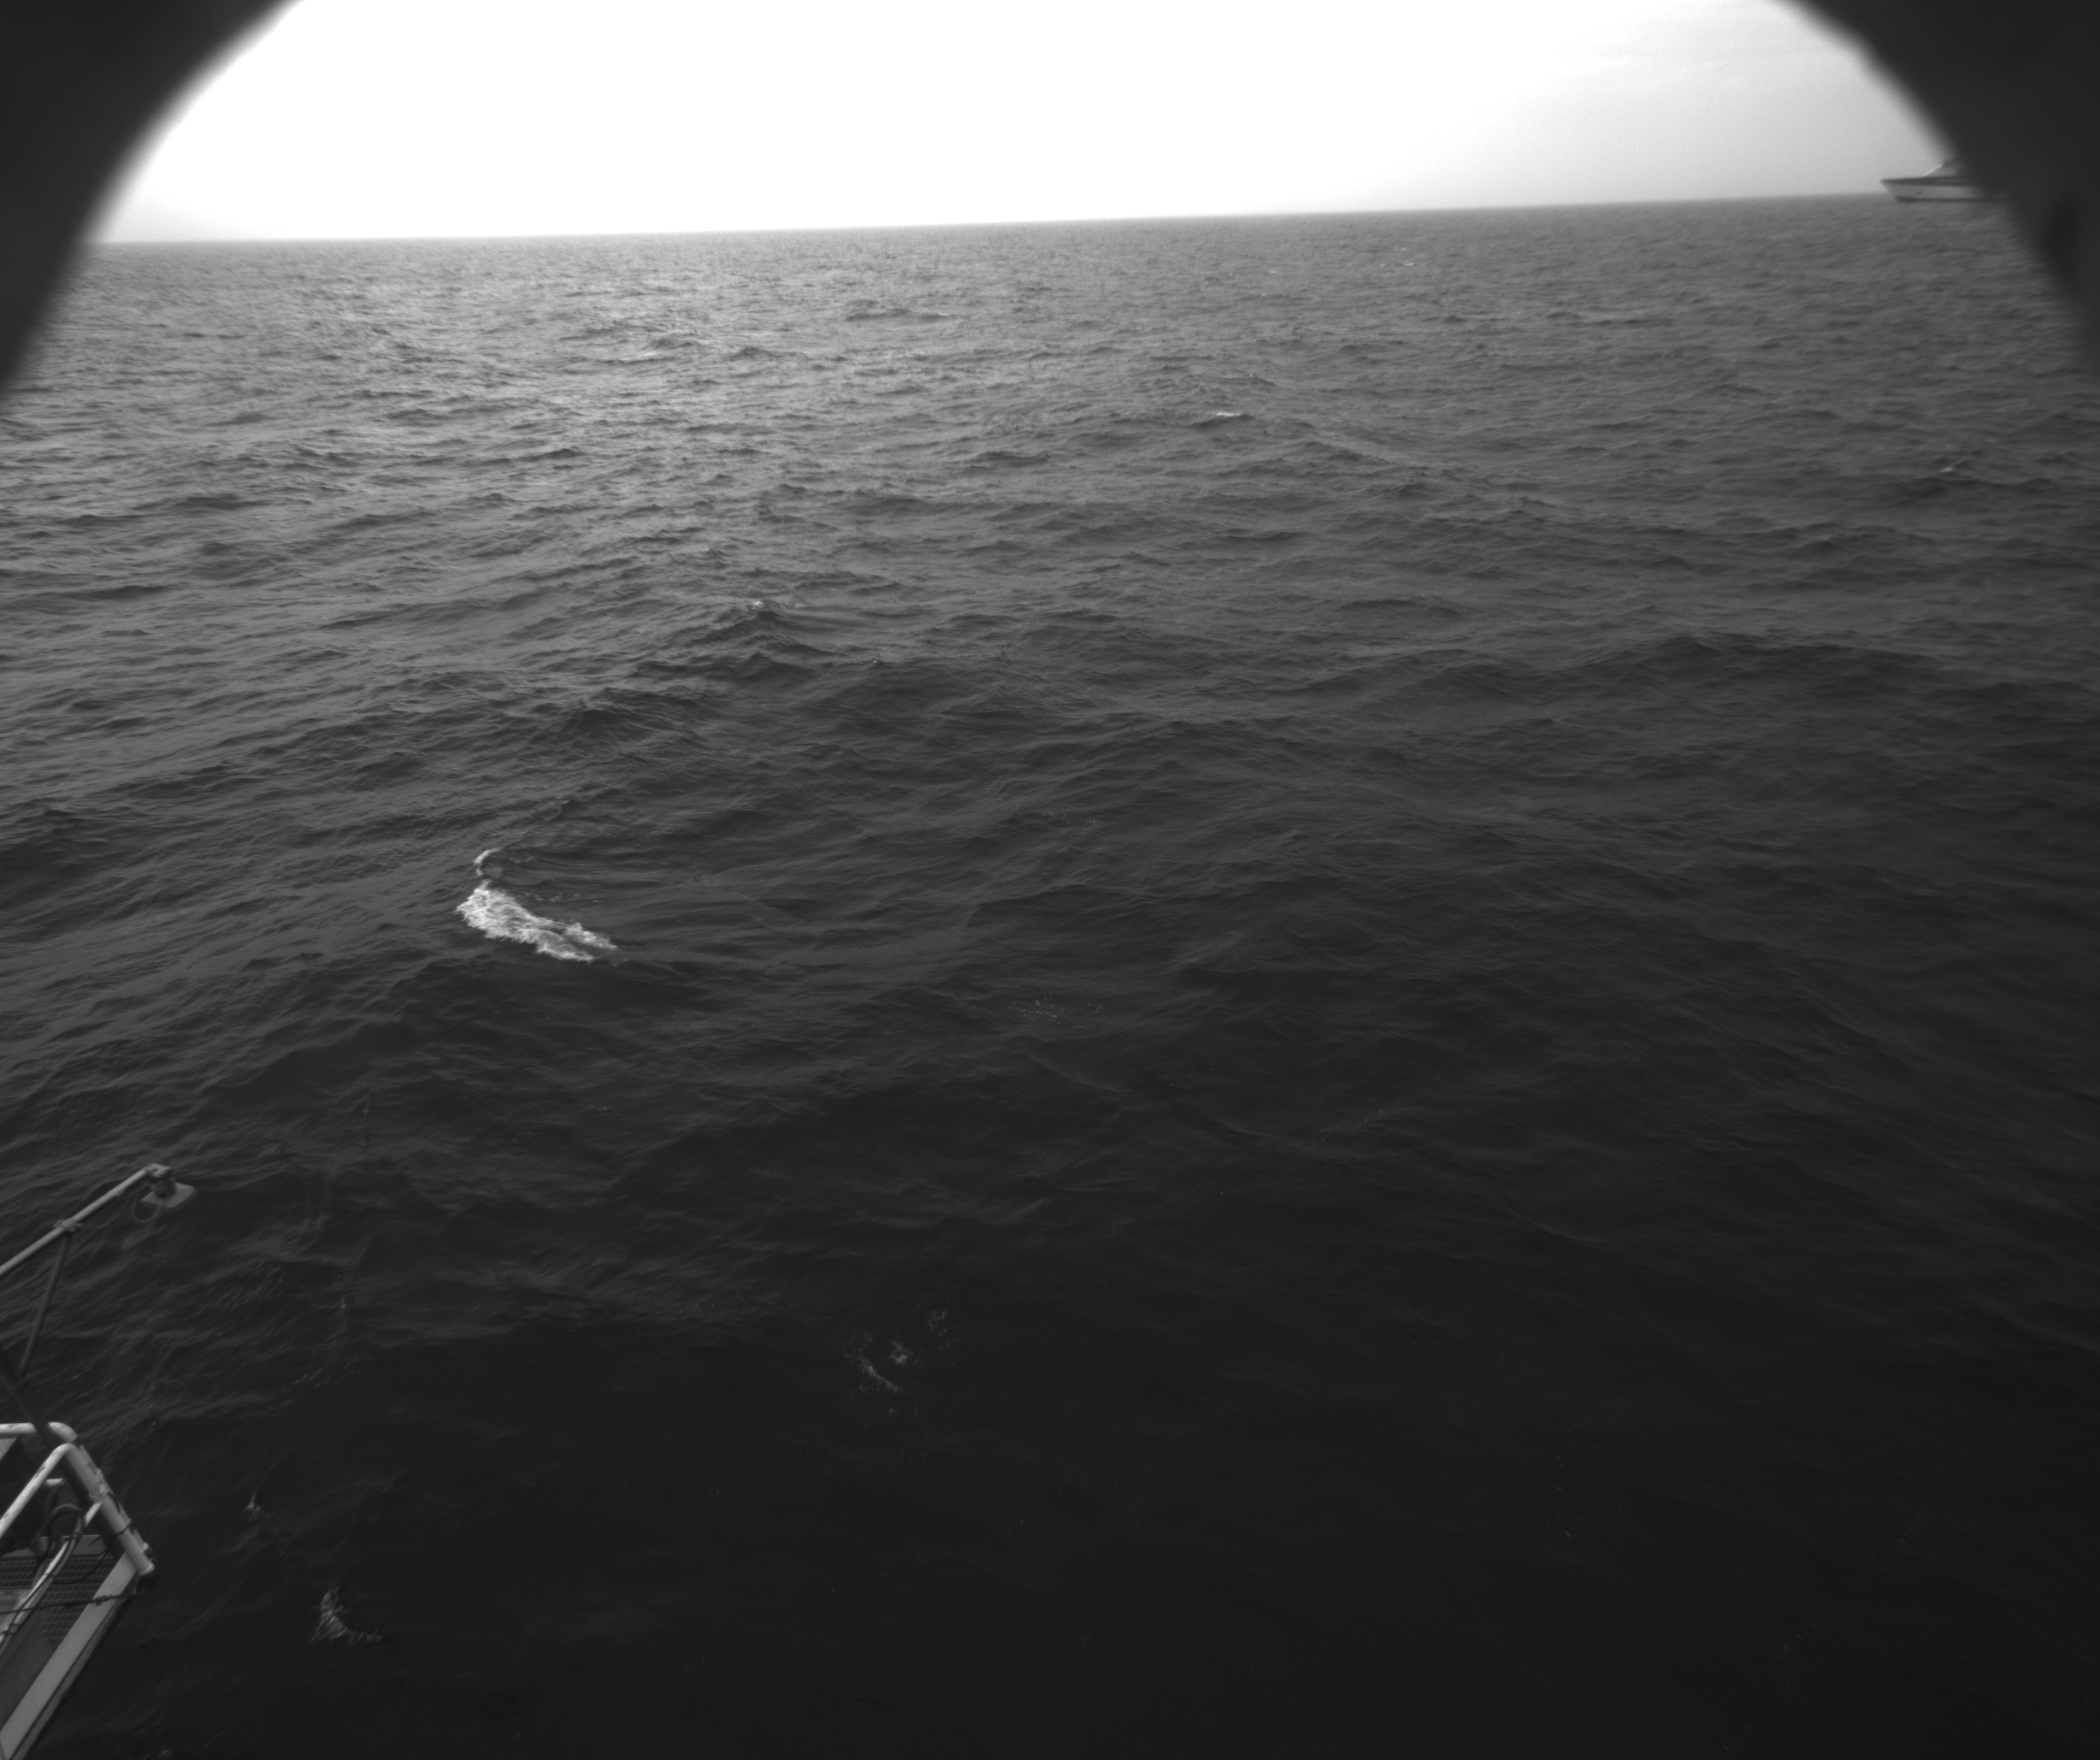

In [ ]:
img = Image.open('/content/gdrive/Shareddrives/TCC - S09/Notebooks/data/AA_2015/2015-05-15_09-00-00_12Hz/input/cam1/001344_0000112000341_01.png')
img

### Imagens Kaggle

In [ ]:
from IPython.core.interactiveshell import default_banner
base_path = '/content/gdrive/Shareddrives/TCC - S09/Notebooks/splitted data/224x224/3. Testing'

for i in range(1,5):
  data = []
  for img in tqdm(os.listdir(f'{base_path}/{i}')):
    img = Image.open(f'{base_path}/{i}/{img}')
    
    # Transformações a serem aplicadas nas imagens
    transform = transforms.Compose([
      transforms.Grayscale(num_output_channels=3)
    ])

    data.append(transform(img))

  with open(f'/content/gdrive/Shareddrives/TCC - S09/Notebooks/splitted data/test/kaggle_{i}.pkl', 'wb') as f:
    pickle.dump(data, f)

100%|██████████| 1200/1200 [00:05<00:00, 233.97it/s]


In [ ]:
with open('/content/gdrive/Shareddrives/TCC - S09/Notebooks/splitted data/test/kaggle_4.pkl', 'rb') as f:
    record = pickle.load(f)

In [ ]:
with open('/content/gdrive/Shareddrives/TCC - S09/Notebooks/splitted data/test/LJ_2018_2018-01-03_09-39-38_10Hz_2058_224.pkl', 'rb') as f:
    record = pickle.load(f)

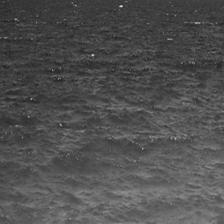

In [ ]:
record[0]

### Metrics report

In [ ]:
with open('/content/gdrive/Shareddrives/TCC - S09/Notebooks/metrics/resnet34_splitted_weighted_oversample_kaggle_tpn_metrics.pkl', 'rb') as f:
    metrics = pickle.load(f)

In [ ]:
for key in metrics.keys():
  print(metrics[key])

{'train': {'acc': tensor(0.8995, device='cuda:0', dtype=torch.float64), 'loss': 0.2693954756448086}, 'val': {'acc': tensor(0.9441, device='cuda:0', dtype=torch.float64), 'loss': 0.1662838432214556}}
{'train': {'acc': tensor(0.9362, device='cuda:0', dtype=torch.float64), 'loss': 0.17040189012504406}, 'val': {'acc': tensor(0.9445, device='cuda:0', dtype=torch.float64), 'loss': 0.15709278238080715}}
{'train': {'acc': tensor(0.9381, device='cuda:0', dtype=torch.float64), 'loss': 0.1619083439566902}, 'val': {'acc': tensor(0.9537, device='cuda:0', dtype=torch.float64), 'loss': 0.12226333154786895}}
{'train': {'acc': tensor(0.9434, device='cuda:0', dtype=torch.float64), 'loss': 0.1495291586073428}, 'val': {'acc': tensor(0.9569, device='cuda:0', dtype=torch.float64), 'loss': 0.12175009161451437}}
{'train': {'acc': tensor(0.9456, device='cuda:0', dtype=torch.float64), 'loss': 0.1425487600046679}, 'val': {'acc': tensor(0.9482, device='cuda:0', dtype=torch.float64), 'loss': 0.14525745337026832}}


In [ ]:
import numpy as np

train_acc = []
val_acc = []
train_loss = []
val_loss =[]

for key in metrics.keys():
  train_acc.append(metrics[key]['train']['acc'].to('cpu').item())
  val_acc.append(metrics[key]['val']['acc'].to('cpu').item())
  train_loss.append(metrics[key]['train']['loss'])
  val_loss.append(metrics[key]['val']['loss'])

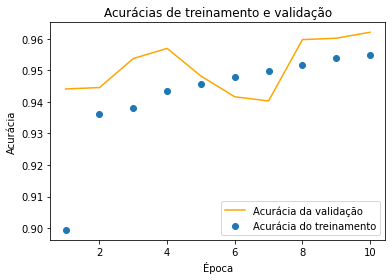

In [ ]:
## Plot accuracy
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter([i for i in range(1, 11)], train_acc, label='Acurácia do treinamento')
plt.plot([i for i in range(1, 11)], val_acc, color='orange', label='Acurácia da validação')
plt.title('Acurácias de treinamento e validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(loc = 'best')
plt.show()

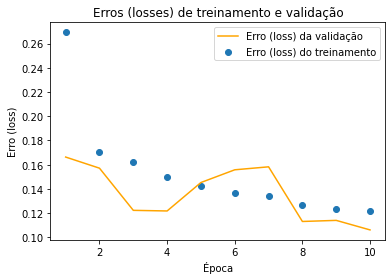

In [ ]:
## Plot loss
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter([i for i in range(1, 11)], train_loss, label='Erro (loss) do treinamento')
plt.plot([i for i in range(1, 11)], val_loss, color='orange', label='Erro (loss) da validação')
plt.title('Erros (losses) de treinamento e validação')
plt.xlabel('Época')
plt.ylabel('Erro (loss)')
plt.legend(loc = 'best')
plt.show()